NLP - Spam Filtering

In [1]:
from datetime import date

print(date.today())

2020-06-30


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv", filename="spam.csv")

dat = pd.read_csv('spam.csv',encoding='latin1')
dat.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
dat= dat.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
dat.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


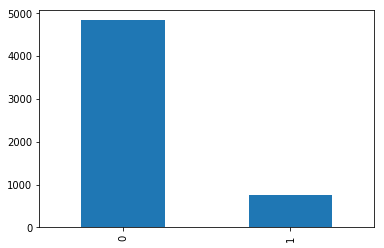

In [5]:
dat['v1'] = dat['v1'].replace(['ham', 'spam'], [0,1])
dat['v1'].value_counts().plot(kind= 'bar') #

In [6]:
print('There are {} number of obs.' .format(dat.shape[0]))

There are 5572 number of obs.


In [7]:
# check for unique
dat['v1'].nunique(), dat['v2'].nunique()

(2, 5169)

In [8]:
# 403 duplicates
dat.drop_duplicates(['v2'], inplace = True)

dat.v2.nunique()

5169

In [9]:
dat.groupby('v1').size()

v1
0    4516
1     653
dtype: int64

In [10]:
xdata = dat['v2']
ydata = dat['v1']

print('Numb of mails : %d' %len(xdata))
print('Numb of labels : %d' %len(ydata))

Numb of mails : 5169
Numb of labels : 5169


In [12]:
# int encoding 

t = Tokenizer()
t.fit_on_texts(xdata) # tokenizing
sequences = t.texts_to_sequences(xdata) # word -> int, index

In [14]:
print(sequences[:5])

[[47, 433, 4013, 780, 705, 662, 64, 8, 1202, 94, 121, 434, 1203, 142, 2712, 1204, 68, 57, 4014, 137], [49, 306, 1364, 435, 6, 1767], [53, 537, 8, 20, 4, 1016, 934, 2, 220, 2713, 1365, 706, 2714, 2715, 267, 2716, 70, 2713, 2, 2717, 2, 359, 537, 604, 1205, 82, 436, 185, 707, 437, 4015], [6, 226, 152, 23, 347, 2718, 6, 138, 145, 56, 152], [935, 1, 97, 96, 69, 453, 2, 877, 69, 1768, 198, 105, 438]]


In [16]:
# check for word index 
word_ind = t.word_index
#print(word_ind)
t.word_counts.items()

odict_items([('go', 271), ('until', 27), ('jurong', 1), ('point', 13), ('crazy', 15), ('available', 16), ('only', 199), ('in', 826), ('bugis', 7), ('n', 131), ('great', 106), ('world', 27), ('la', 7), ('e', 92), ('buffet', 2), ('cine', 7), ('there', 185), ('got', 232), ('amore', 1), ('wat', 95), ('ok', 258), ('lar', 38), ('joking', 6), ('wif', 27), ('u', 1043), ('oni', 4), ('free', 251), ('entry', 21), ('2', 473), ('a', 1293), ('wkly', 9), ('comp', 10), ('to', 2070), ('win', 57), ('fa', 2), ('cup', 6), ('final', 15), ('tkts', 2), ('21st', 2), ('may', 45), ('2005', 2), ('text', 175), ('87121', 2), ('receive', 32), ('question', 18), ('std', 7), ('txt', 148), ('rate', 27), ('t', 65), ("c's", 15), ('apply', 27), ("08452810075over18's", 1), ('dun', 55), ('say', 83), ('so', 439), ('early', 33), ('hor', 2), ('c', 95), ('already', 91), ('then', 233), ('nah', 10), ('i', 2229), ("don't", 129), ('think', 130), ('he', 184), ('goes', 26), ('usf', 11), ('lives', 4), ('around', 61), ('here', 120), ('

In [18]:
# removing words that has low freq
threshold = 3

total_cnt = len(word_ind)
rare_cnt = 0 
total_freq = 0
rare_freq = 0

for key, val in t.word_counts.items():
    total_freq += val
    
    if val < threshold:
        rare_cnt += 1
        rare_freq += val
        
print('The number of words that appears less than %s times are: %s ' %(threshold - 1, rare_cnt))
print('The proportion of rare words in the dataset : ', (rare_cnt /total_cnt) * 100)
print('The freq of rare words appears in the dataset: ', (rare_freq/ total_freq) * 100)

The number of words that appears less than 2 times are: 6209 
The proportion of rare words in the dataset :  69.60762331838565
The freq of rare words appears in the dataset:  9.307225182798364


In [19]:
vocab_size = len(word_ind)+1
print('The size of vocab : %d' %vocab_size)

The size of vocab : 8921


In [21]:
# train/test split ratio : 0.8

n_of_train = int(len(sequences) * 0.8)
n_of_test = int(len(sequences) - n_of_train)
print('Numb of Train :',n_of_train)
print('Numb of Test :',n_of_test)

Numb of Train : 4135
Numb of Test : 1034


In [24]:
# length of mails

xdata = sequences
print('The max length of an email is : %d' %max(len(l) for l in xdata))
print('The min length of an email is : %d' %min(len(l) for l in xdata))
print('The avg length of an email is : %d' %(sum(map(len, xdata))/len(xdata)))

The max length of an email is : 189
The min length of an email is : 0
The avg length of an email is : 15


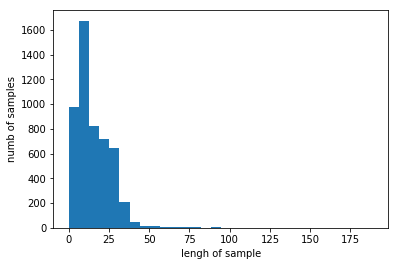

In [27]:
plt.hist([len(s) for s in xdata], bins= 30)
plt.xlabel('lengh of sample')
plt.ylabel('numb of samples')
plt.show()

In [29]:
# padding 

max_len = 189
pad_dat = pad_sequences(xdata, maxlen=max_len)
print('the size of train set', pad_dat.shape)

the size of train set (5169, 189)


In [32]:
pad_dat[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [34]:
# train test split
xtrain = pad_dat[:n_of_train]
ytrain = np.array(ydata[:n_of_train])

xtest = pad_dat[n_of_train:]
ytest = np.array(ydata[n_of_train:])

xtrain.shape, xtest.shape,ytrain.shape, ytest.shape

((4135, 189), (1034, 189), (4135,), (1034,))

In [35]:
# Vanila RNN

from keras.layers import SimpleRNN, Embedding, Dense
from keras.models import Sequential

model = Sequential([
    Embedding(vocab_size, 32), 
    SimpleRNN(32), 
    Dense(1, activation = 'sigmoid')
])

model.compile(optimizer= 'rmsprop', loss='binary_crossentropy', metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [36]:
history = model.fit(xtrain, ytrain, epochs= 4, batch_size= 64, validation_split=0.2)

C:\Users\caffr\Anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:353: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3308 samples, validate on 827 samples
Epoch 1/4
3308/3308 [==============================] - 3s 895us/step - loss: 0.5534 - acc: 0.7213 - val_loss: 0.4263 - val_acc: 0.8730
Epoch 2/4
3308/3308 [==============================] - 2s 691us/step - loss: 0.3797 - acc: 0.8700 - val_loss: 0.3314 - val_acc: 0.8742
Epoch 3/4
3308/3308 [==============================] - 2s 728us/step - loss: 0.1795 - acc: 0.9468 - val_loss: 0.1053 - val_acc: 0.9734
Epoch 4/4
3308/3308 [==============================] - 2s 714us/step - loss: 0.0764 - acc: 0.9834 - val_loss: 0.0614 - val_acc: 0.9855


In [44]:
df = pd.DataFrame(history.history)
df.head()

,val_loss,val_acc,loss,acc
0,0.426256,0.873035,0.553450,0.721282
1,0.331420,0.874244,0.379668,0.870012
2,0.105311,0.973398,0.179525,0.946796
3,0.061414,0.985490,0.076442,0.983374


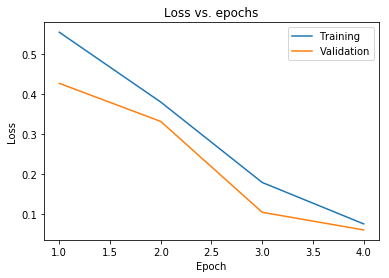

In [47]:
epochs = range(1, len(history.history['loss'])+1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

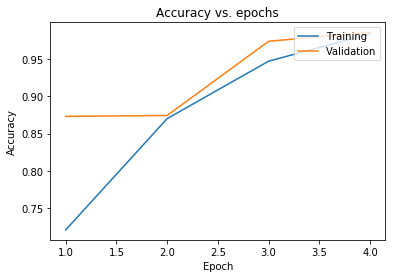

In [49]:
epochs = range(1, len(history.history['acc'])+1)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()